In [2]:
import numpy as np
import pandas as pd
import scipy
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import os

from tools import PatchForager

In [3]:
# Load the CSV file

filename = 'data/batch3_exp2.csv'
df = pd.read_csv(filename, index_col=0)

In [9]:
df

,Seconds,label,start_position,length,active_patch,visit_number,has_choice,reward_delivered,stop_cue,succesful_wait,...,previous_intersite,same_patch,perceived_reward_probability,mouse,session,session_number,within_session_number,experiment,environment,engaged
1970-01-01 00:00:00.000042688,6.022088e+06,InterPatch,23.021217,123.315607,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,715866,20240611,32,1,experiment2,mix,True
1970-01-01 00:00:00.000042689,6.022091e+06,InterSite,146.336824,57.865656,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,715866,20240611,32,1,experiment2,mix,True
1970-01-01 00:00:00.000042690,6.022093e+06,RewardSite,204.202480,50.000000,0.0,0.0,True,1.0,6.022094e+06,6.022095e+06,...,6.022091e+06,0.0,0.0,715866,20240611,32,1,experiment2,mix,True
1970-01-01 00:00:00.000042691,6.022096e+06,InterSite,254.202480,57.039474,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,715866,20240611,32,1,experiment2,mix,True
1970-01-01 00:00:00.000042692,6.022101e+06,RewardSite,311.241954,50.000000,0.0,1.0,False,0.0,NaN,NaN,...,6.022096e+06,0.0,0.5,715866,20240611,32,1,experiment2,mix,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000580819,8.442163e+06,RewardSite,43961.853921,50.000000,105.0,0.0,False,0.0,NaN,NaN,...,8.442162e+06,0.0,0.0,716457,20240628,38,14,experiment2,mix,False
1970-01-01 00:00:00.000580820,8.442165e+06,InterSite,44011.853921,32.497571,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,716457,20240628,38,14,experiment2,mix,False
1970-01-01 00:00:00.000580821,8.442166e+06,InterPatch,44044.398438,124.675069,106.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,716457,20240628,38,14,experiment2,mix,False
1970-01-01 00:00:00.000580822,8.442180e+06,InterSite,44169.073506,33.084161,106.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,716457,20240628,38,14,experiment2,mix,False


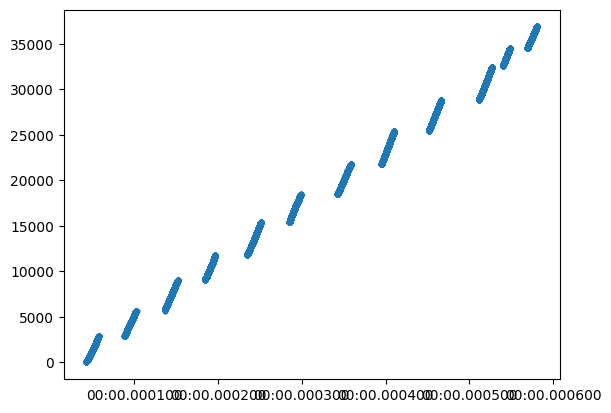

In [36]:
reward_delivered = df['reward_delivered'].cumsum(skipna=True)
plt.plot(reward_delivered,'.')

/var/folders/rv/bpj1qnwx5lz32q8rr9jxs07h0000gp/T/ipykernel_61616/3858974456.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_time = df['Seconds'] - df['Seconds'][0]


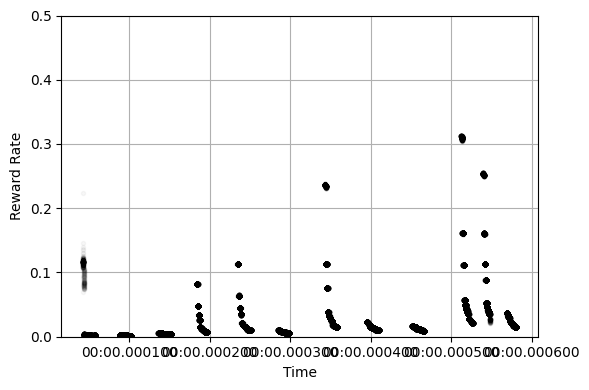

In [47]:
# Plot: Reward Rate over Time
plt.figure(figsize=(6, 4))

# Calculate reward rate
cumulative_reward = df['reward_delivered'].cumsum(skipna=True)
total_time = df['Seconds'] - df['Seconds'][0]
reward_rate = cumulative_reward / total_time

# Plot reward rate over time
plt.plot(reward_rate, '.k', alpha=0.3)

plt.ylim([0,.5])
plt.xlabel('Time')
plt.ylabel('Reward Rate')
# plt.title('Reward Rate over Time for Different Strategies')

plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('figs/reward_rate_all.png')

In [54]:
df['label'][dataframe]

/var/folders/rv/bpj1qnwx5lz32q8rr9jxs07h0000gp/T/ipykernel_61616/133103532.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['label'][dataframe]


1970-01-01 00:00:00.000042688    InterPatch
1970-01-01 00:00:00.000042689     InterSite
1970-01-01 00:00:00.000042690    RewardSite
1970-01-01 00:00:00.000042691     InterSite
1970-01-01 00:00:00.000042692    RewardSite
                                    ...    
1970-01-01 00:00:00.000043683     InterSite
1970-01-01 00:00:00.000043684    InterPatch
1970-01-01 00:00:00.000043685     InterSite
1970-01-01 00:00:00.000043686    RewardSite
1970-01-01 00:00:00.000043687     InterSite
Name: label, Length: 1000, dtype: object

/var/folders/rv/bpj1qnwx5lz32q8rr9jxs07h0000gp/T/ipykernel_61616/1537543413.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df['visit_number'][dataframe], '.k', alpha=0.3)
/var/folders/rv/bpj1qnwx5lz32q8rr9jxs07h0000gp/T/ipykernel_61616/1537543413.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df['label'][dataframe]=='InterPatch', '.m', alpha=0.3)
/var/folders/rv/bpj1qnwx5lz32q8rr9jxs07h0000gp/T/ipykernel_61616/1537543413.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

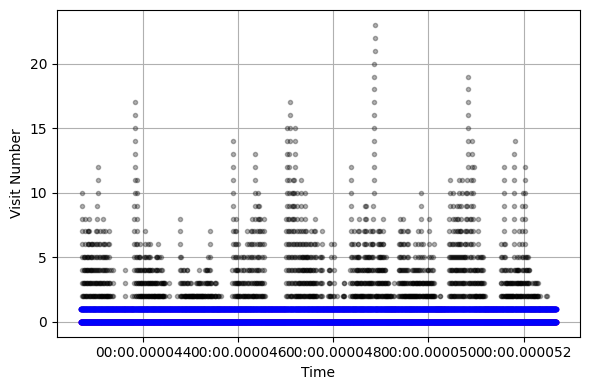

In [56]:
# Plot: Reward Rate over Time
plt.figure(figsize=(6, 4))

# Plot reward rate over time
dataframe = range(10000)
plt.plot(df['visit_number'][dataframe], '.k', alpha=0.3)
plt.plot(df['label'][dataframe]=='InterPatch', '.m', alpha=0.3)
plt.plot(df['label'][dataframe]=='InterSite', '.b', alpha=0.3)

# plt.ylim([0,.5])
plt.xlabel('Time')
plt.ylabel('Visit Number')
# plt.title('Reward Rate over Time for Different Strategies')

plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('figs/reward_rate_all.png')

In [62]:
def read_csv_data(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Convert the first column to datetime and set it as index
    df.set_index(pd.to_datetime(df.iloc[:, 0]), inplace=True)
    df = df.iloc[:, 1:]  # Remove the original time column
    
    return df

def split_into_sessions(df):
    # Split the dataframe into sessions based on NaN gaps
    sessions = []
    current_session = []
    
    for index, row in df.iterrows():
        if row.isnull().all():
            if current_session:
                sessions.append(pd.DataFrame(current_session))
                current_session = []
        else:
            current_session.append(row)
    
    if current_session:
        sessions.append(pd.DataFrame(current_session))
    
    return sessions

In [63]:
# Read and process the data
df = read_csv_data(filename)
sessions = split_into_sessions(df)

In [72]:
def read_csv_data(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Convert the first column to datetime and set it as index
    df.set_index(pd.to_datetime(df.iloc[:, 0]), inplace=True)
    df = df.iloc[:, 1:]  # Remove the original time column
    
    return df

def split_into_sessions(df):
    # Group the dataframe by session number
    return [group for _, group in df.groupby('session_number')]

def plot_session_data(sessions):
    plt.style.use('ggplot')
    color_set = plt.cm.Set1(np.linspace(0, 1, len(sessions)))
    
    for i, session in enumerate(sessions):
        # Calculate time in seconds from the start of the session
        session['time'] = (session.index - session.index[0]).total_seconds()
        
        # Plot cumulative reward over time
        plt.plot(session['time'], session['reward_delivered'].cumsum(skipna=True), 
                 label=f'Session {session["session_number"].iloc[0]}',
                 alpha=0.3, lw=3, color=color_set[i])
    
    plt.xlabel('Time (seconds)')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Reward Over Time for Multiple Sessions')
    plt.legend()
    plt.show()


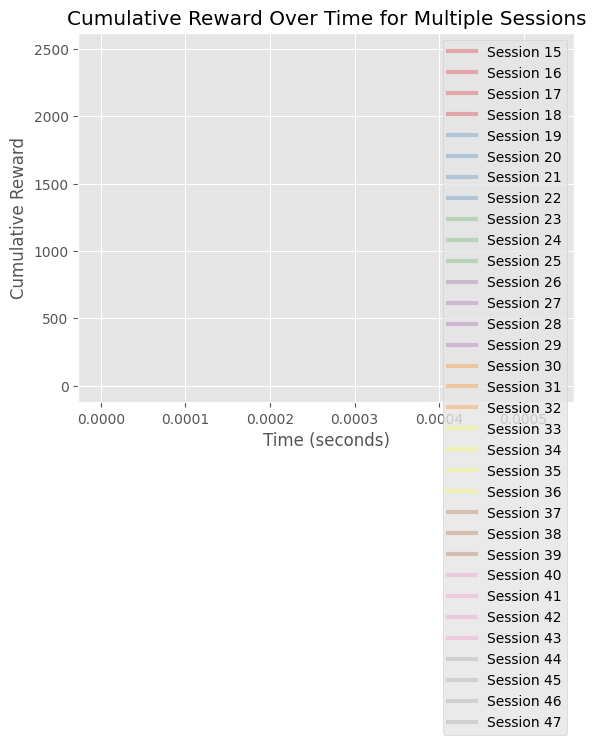

In [73]:
# Read and process the data
df = read_csv_data(filename)
sessions = split_into_sessions(df)

# Plot the data
plot_session_data(sessions)

In [75]:
i

32

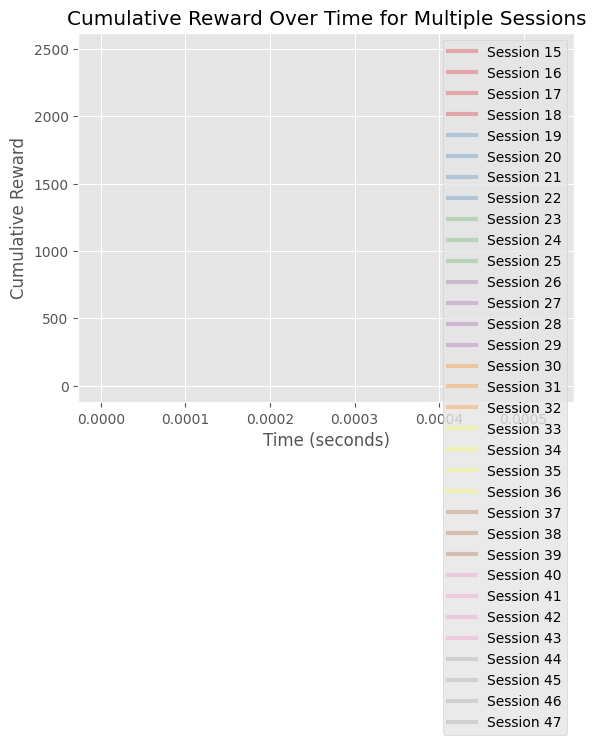

In [74]:
plt.style.use('ggplot')
color_set = plt.cm.Set1(np.linspace(0, 1, len(sessions)))

for i, session in enumerate(sessions):
    # Calculate time in seconds from the start of the session
    session['time'] = (session.index - session.index[0]).total_seconds()
    
    # Plot cumulative reward over time
    plt.plot(session['time'], session['reward_delivered'].cumsum(skipna=True), 
             label=f'Session {session["session_number"].iloc[0]}',
             alpha=0.3, lw=3, color=color_set[i])

plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Over Time for Multiple Sessions')
plt.legend()
plt.show()